#Visualisation of the electrostatic dipole

This notebook shows how to numerically calculate and visualise the fields around an electrostatic dipole
It makes use of the superposition of the fields of 2 charged conducting spheres (to avoid divergence at core of charge cloud).
We will calculate and show the E field as vectors, the E field strength |E|, E field as streamlines, the electrostatic potential and the equipotential surfaces.
(C) Jo Verbeeck, EMAT, University of Antwerp,  sept 2019

Things to try and learn:
-Get an example of electrostatic fieldlines, fields, potential and equipotential surfaces for the simple case of a dipole
-The behaviour of the field and potential inside a conducting sphere
-What would happen if the charges of the dipole where not opposite? Can you understand what happens?
-What happens if the charges get further away or closer by?
-Can you add a 3rd charge?
-Can you create a region in space where a testcharge would be at rest by using as many static charges as you want? (Earnshaw beware)
-The principle of superposition for both potential and fields
-The use of vector fields
-A taste of what a Jupyter notebook could do for you

load the required libraries for calculation and plotting

In [30]:
import numpy as np
import matplotlib.pyplot as plt

create grid to plot (choose 2D plane for visualisation cutting through charge centers , but calculation is correct for 3D)

In [9]:
xpoints=256 #nr of grid points in 1 direction
xmax=1 #extension of grid [m]
pref=9e9 # 1/(4pi eps0)
x=np.linspace(-xmax,xmax,xpoints)
y=x
[x2d,y2d]=np.meshgrid(x,y) #2D matrices holding x or y coordinate for each point on the grid
r=np.sqrt(np.square(x2d)+np.square(y2d))

define 2 conducting spheres with opposite charge 

In [56]:
#sphere 1
q=1e-10 #charge on spheres [C]
radius=0.2*xmax #radius of spheres [m]
q1=q #charge on sphere 1 [C]
x1=-0.5*xmax #x position of sphere 1 [m]
y1=0 #y position of sphere 1[m]

r1=np.sqrt(np.square(x2d-x1)+np.square(y2d-y1)) #distance to charge 1
in1=r1<radius  #logical function 1 if inside sphere, 0 if outside
out1=r1>=radius #logical function 0 if inside sphere, 1 if outside

e1x=pref*q1*np.divide(x2d-x1,np.power(r1,3)) #x component of E field valid outside sphere
e1y=pref*q1*np.divide(y2d-y1,np.power(r1,3)) #y component of E field valid outside sphere
#note that we don't need the z component here as we will be looking in a plane where ez=0, for a generic 3d position you need to calculate ez as well
v1=pref*q1*np.divide(np.ones(r1.shape),r1) # potential 1/r valid outside sphere

#sphere 2
q2=-q #charge on sphere 2 [C]
x2=0.5*xmax #x position of sphere 2 [m]
y2=0 #y position of sphere 2[m]

r2=np.sqrt(np.square(x2d-x2)+np.square(y2d-y2)) #distance to charge 1
in2=r2<radius  #logical function 1 if inside sphere, 0 if outside
out2=r2>=radius #logical function 0 if inside sphere, 1 if outside

e2x=pref*q2*np.divide(x2d-x2,np.power(r2,3)) #x component of E field valid outside sphere
e2y=pref*q2*np.divide(y2d-y2,np.power(r2,3)) #y component of E field valid outside sphere
#note that we don't need the z component here as we will be looking in a plane where ez=0, for a generic 3d position you need to calculate ez as well
v2=pref*q2*np.divide(np.ones(r2.shape),r2) # potential 1/r valid outside sphere

Now apply superposition of both fields (but take care of special cases inside the spheres where there is no field as they are conducting spheres)

In [57]:
ex=np.multiply(e1x+e2x,np.multiply(out1,out2)) #E field only if outside both spheres (multiplying with out1 and out2 results in nonzero only outside spheres), inside sphere E=0 because conductor [V/m]
ey=np.multiply(e1y+e2y,np.multiply(out1,out2))
e=np.sqrt(np.square(ex)+np.square(ey)) #and size of E
v=np.multiply(v1+v2,np.multiply(out1,out2))+in1*pref*q1/radius+in2*pref*q2/radius #potential, inside spheres is constant (conductors)

Compare these numerical results to the approximate formula of a dipole field (only valid far away from charges), note how it really only starts to compare to the real dipole when far away from the dipole

In [58]:
px=q*(x1-x2) #x component of dipole moment [Cm]
py=q*(y1-y2) #y component of dipole moment [Cm]
vdip=pref*np.divide(px*x2d+py*y2d,np.power(r,3))
exdip=-pref*(px*np.power(r,-3)-3*np.multiply(np.multiply(px*x2d+py*y2d,x2d),np.power(r,-5)))
eydip=-pref*(py*np.power(r,-3)-3*np.multiply(np.multiply(px*x2d+py*y2d,y2d),np.power(r,-5)))
edip=np.sqrt(np.square(exdip)+np.square(eydip))

And now its showtime!

(-1.0901960784313727,
 1.0666666666666669,
 -1.0901960784313727,
 1.0666666666666669)

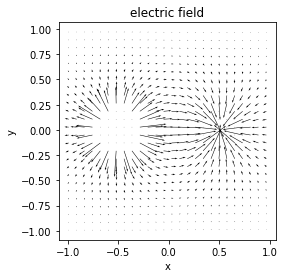

In [65]:
#show vector plot, but limit number of points to keep the number of vector reasonable
scale=1
nsteps=25 #total number of vector points in each direction
step=round(xpoints/nsteps)
plt.quiver(x2d[1:xpoints:step,1:xpoints:step],y2d[1:xpoints:step,1:xpoints:step],ex[1:xpoints:step,1:xpoints:step],ey[1:xpoints:step,1:xpoints:step])
plt.title('electric field')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')

Note how the field emanates from the positive charge sinks into the negative charge

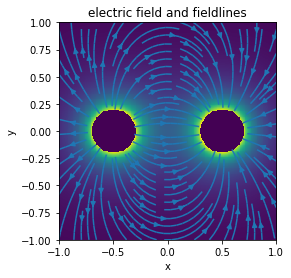

In [76]:
plt.imshow(e,extent=[-xmax, xmax, -xmax, xmax])
plt.title('electric field and fieldlines')
plt.xlabel('x');
plt.ylabel('y');
plt.streamplot(x2d,y2d,ex,ey)
plt.axis('square')
plt.colorbar
plt.show()



Note how the field is symmetrical along the x and y direction

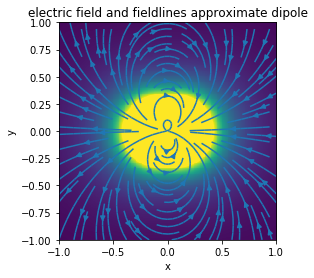

In [73]:
plt.imshow(edip,extent=[-xmax, xmax, -xmax, xmax],vmin=np.min(e),vmax=np.max(e)) #scale color to same as real dipole to allow comparison
plt.title('electric field and fieldlines approximate dipole')
plt.xlabel('x');
plt.ylabel('y');
plt.streamplot(x2d,y2d,exdip,eydip)
plt.axis('square')
plt.colorbar
plt.show()

Note how different the field strength and the fieldlines are for the approximated dipole vs the actual dipole. Only far away from the dipole are the fields approaching. Remember this if you ever want to apply the convenient dipole formula but might be too close to the actual dipole source.

(-1.0, 1.0, -1.0, 1.0)

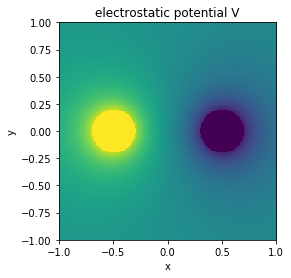

In [74]:
plt.imshow(v,extent=[-xmax, xmax, -xmax, xmax]) 
plt.title('electrostatic potential V')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')

Note the positive potential on the positive charge and the negative potential on the negative charge. The potential inbetween the charges is a smooth function with no minima or maxima and the potential inside the conducting spheres is constant.

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

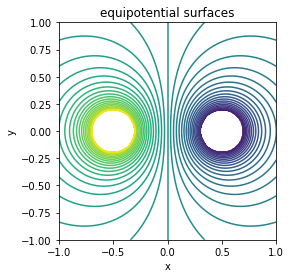

In [80]:
nlines=50;
plt.contour(x2d,y2d,v,nlines)
plt.title('equipotential surfaces')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')
plt.colorbar

Equipotential lines are always perpendicular to the fieldlines.